## Week 1 - assignment
_Freek Plak - 15 November 2020_

This weeks assignment with comments in between explaining what we are doing and why.

First we are importing seaborn to plot the graphs, matplotlib.pyplot for setting labels and pandas to create the dataframe.

In [100]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

### Importing data
Now we create two dataframes from reading the csv file's offered before the assignment. As steps uses a European notation it seperates by ; instead of , which is default for pandas. That's why we need to define this.

- A dataframe for steps each day and the id of the person who used the device
- A dataframe with some details of the person also including the id of the person

Both dataframes have the same id key so when we combined both by merging them on ID. This is not needed for this assignment (we only need steps.csv) but it was needed for the in class assignment. We end with printing a head (first 5 rows of the new merged dataframe).

In [102]:
df1 = pd.read_csv('steps.csv', sep=';')
df2 = pd.read_csv('survey.csv')

df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Cleaning Data

There are some data inputs from the survey that don't match what is expected. I believe that any weight in kg **above 180kg** or **below 50kg** is incorrect and we filter those out by replacing it with an empty value. 

To check the output we check how often values are present in the dataframe.

In [103]:
#To remove the values above 180 kg and below 50 kg, we need to create a function that we then apply to the entire column
def above_180(x):
    if(x > 180.0): 
        return float('NaN')
    else: 
        return x
def below_50(x):
    if(x < 50.0): 
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(above_180)
df['weight'] = df['weight'].apply(below_50)
df['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
102.0     1
116.0     1
128.0     1
115.0     1
101.0     1
Name: weight, Length: 63, dtype: int64

### Analysing data

We didn't really need the data cleaning and survey data to begin with for this assignment but it was already present during the in class assignment. Now we are moving to the next part of the assignment:

`- A plot of a time series of your choice, e.g. mean steps per day over all participants`

We first calculate the mean of all steps and exclude the NaN fields. As we ran the mean over the full DataFrame we also have the mean for id, hh_size, etc. We drop those rows from the result. After that reset the index to get 2 columns again. Rename the columns to call them easier. 

_Here I ran in to a problem, the column with the result of mean steps was called 0 when printed, but couldn't be addressed as 0 in the renaming or the plotting._

_Used an extra line addressing the specific column based on it's position and renaming it that way._

Printed the first 5 rows to get an idea of the DataFrame.

In [104]:
df_average = df.mean(skipna=True)
df_average = df_average.drop(['id','hh_size', 'education', 'height', 'weight'])
df_average = df_average.reset_index()
df_average = df_average.rename({'index': 'date', '0': 'steps'}, axis=1)
df_average.rename(columns={ df_average.columns[1]: "steps" }, inplace = True)
df_average.head()

,date,steps
0,20-6-2013,3642.416667
1,21-6-2013,9034.724280
2,22-6-2013,10889.636691
3,23-6-2013,7402.847973
4,24-6-2013,8110.370056


Now we have our data we plot a __time series graph__, having the __date__ as x-axis and __average steps__ as y-axis. You can see we have a few spikes in average steps which seem unlikely, haven't checked if it's due to a specific error in the data, lack of user data on those days, wrong calculation or other reason. But in the future would be good to understand why this happens.

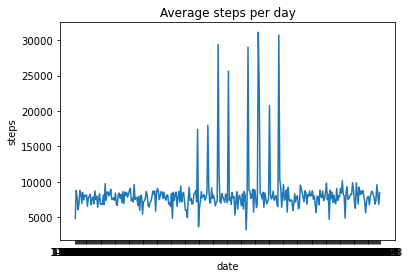

In [105]:
sns.lineplot(x="date", y="steps", data=df_average)
plt.title('Average steps per day')
plt.show()

### Analysis of one quantitative variable
Next up the analysis of mean steps per day.

`An analysis of one quantitative variable (e.g. mean steps per day), including:`

`- 2 graphs of the distribution (e.g., histogram, box plot, density plot, violin plot)`

`- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)`

`- Verbal description of the distribution, including an investigation into its normality, skewness, outliers, etc`

We do this by plotting 2 graphs first up a boxplot:

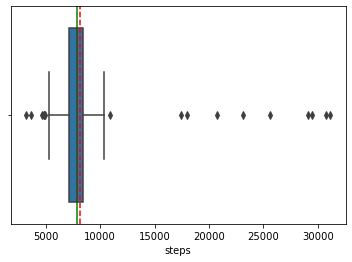

In [110]:
mean=df_average["steps"].mean() #get the mean of steps
median=df_average["steps"].median() #get the median of steps

ax = sns.boxplot(x=df_average["steps"])

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

Next a density plot

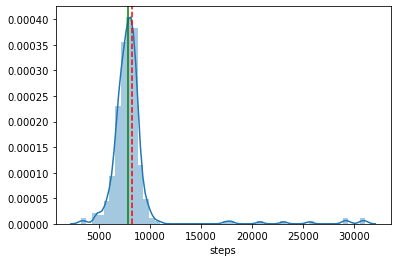

In [111]:
x = df_average["steps"]
ax = sns.distplot(x)

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

### Results / conclusion

I was unable to get the exact numbers for mean, median and variance in the graph. But in both you can see the mean (red line) and the median (green line). Plus we also see there is a high variance as the data stretches all the way to over 30,000 steps while the mean and median are around 7,000 steps. 

The graph is definitly right skewed as the mean is on the right side of the median and the data stretches far to the right. For Normality we can say there are some specific outliers, values higher than 15,000 steps for average are probably invalid values. There are also some outliers on the lower end (below 5,000) but they are far less often and way closer to the expected amount of steps.